## <font color='blue' style='font-size: 30px;'>Detecção de Fraudes em Seguro de Veículos</font>
<hr style='border: 2px solid blue;'>

###<font>

A fraude de seguro de veículo envolve conspirar para fazer reivindicações falsas ou exageradas envolvendo danos materiais ou lesões pessoais após um acidente. 

Alguns exemplos comuns incluem acidentes encenados em que os fraudadores deliberadamente “organizam” a ocorrência de acidentes.

O uso de passageiros fantasmas em que pessoas que nem mesmo estavam no local do acidente alegam ter sofrido ferimentos graves e fazem falsas alegações de danos pessoais quando os danos pessoais são muito exagerados.

Os modelos em machine learning são ferramentas poderosas, que podem auxiliar na previsão de eventuais fraudes futuras.

Trata-se de uma base de dados americana, real e que abrangeu 3 anos da década de 90: 1994, 95 e 96. Mas, nem por isso, perde-se qualidade de análise e previsibilidade.
</font>

##<font color='blue' style='font-size: 30px;'>Sobre a base de dados</font>

###fonte: KAGGLE: Oracle Databases

###<font>extraído de https://www.kaggle.com/shivamb/vehicle-claim-fraud-detection</font>

##<font color='blue' style='font-size: 30px;'>Importando bibliotecas básicas em Python, e a base de dados</font>

In [ ]:
#Bibliotecas básicas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#Abrir base de dados, que está no Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfólio próprio/fraud_oracle.csv')

In [ ]:
#Dados dos EUA, entre 1994 e 1996

dados.head() 

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


##<font color='blue' style='font-size: 30px;'>Explorando a base de dados</font>

In [ ]:
#Conhecendo as variáveis e seus tipos de dados

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
#Observar estatísticas para verificar valores anômalos

dados.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


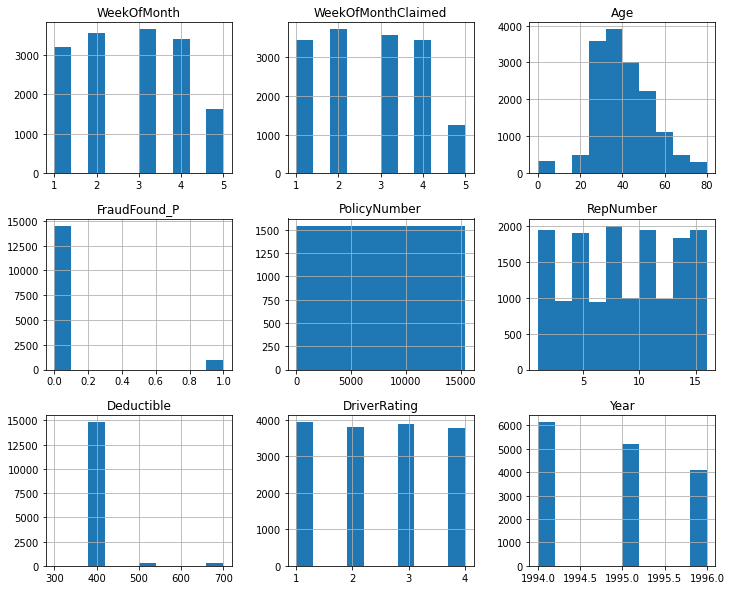

In [ ]:
#Plotar a distribuição de cada variável, dá uma visão geral da mesma e possíveis outliers (valores discrepantes)

#Além de verificar de imediato e de modo visual, variáveis que possuem distribuição proporcional, e não afetam o resultado final

dados.hist(figsize=(12,10));

Aqui já se torna possível conhecer algumas informações relevantes.

Apenas observando os gráficos acima, já é possível verificar que:



1.   A idade média dos que acionam o seguro é de quase 40 anos
2.   O valor médio de franquias acionadas é de $407
3.   A pontuação de 2.48 do motorista mostra que esse não parece ser um fator relevante
4.   A média de 1994.86 na ocorrência dos eventos mostra que a maioria deles ocorreram em 1994, mostrando que talvez a seguradora tenha feito algo para baixar os pedidos nos anos seguintes.

Nada conclusivo, mas certamente útil no cômputo geral.


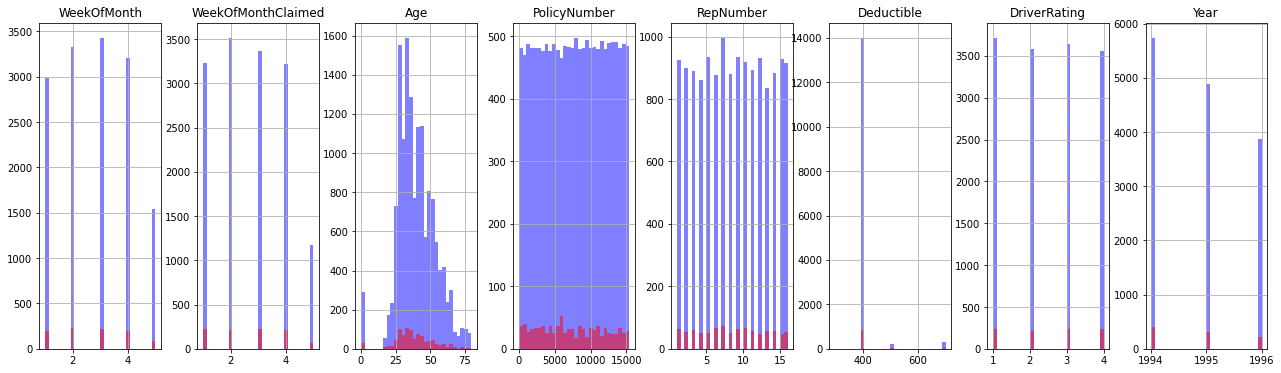

In [ ]:
#Avaliando a relação das variáveis numéricas com as fraudes encontradas

dados['Fraud_evaluation']=dados['FraudFound_P'].replace([0,1],['Não','Sim'])
x_cont=['WeekOfMonth','WeekOfMonthClaimed','Age','PolicyNumber','RepNumber', 'Deductible','DriverRating','Year']
fig, ax = plt.subplots(1, 8, figsize=(22, 6));
dados[dados.Fraud_evaluation == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
dados[dados.Fraud_evaluation == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

Essas visualizações relacionam os dados de fraudes (rosa) e não-fraudes (azul), e confirmam algumas informações interessantes, revelando, por exemplo, que melhor do que a informação de média de idade de 40 anos para acionadores de seguro, é que há uma faixa entre 30 e 40 bem significativa de fraudadores.

###<font color='blue' style='font-size: 30px;'>Retirando valores incoerentes</font>

In [ ]:
#Segundo o comando describe(), apenas a coluna 'Age' possui valores zerados (exceto a variável 'FraudFound_P', claro!)

print(dados['Age'].unique()==0)
len(dados[dados['Age']==0])

[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


320

In [ ]:
#Preencher os valores zerados com a média da coluna 'Age'

dados_2 = dados.copy()
dados_2["Age"] = dados_2["Age"].replace(0,dados["Age"].mean()).astype(int)

#Checando se funcionou

print(dados_2['Age'].unique()==0)
len(dados_2[dados_2['Age']==0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]


0

Claro que não existe ninguém requerendo seguro com 0 anos de vida. Trata-se de algum erro de input de cadastro, mas que precisa ser corrigido para não prejudicar os cálculos do algoritmo.

###<font color='blue' style='font-size: 30px;'>Transformando todos os dados de 'str' para 'int'</font>

In [ ]:
#Transformar as strings em variáveis categóricas por causa dos modelos de ML

for labels, content in dados_2.items():
    if pd.api.types.is_string_dtype(content):
        dados_2[labels] = content.astype("category").cat.as_ordered()

#Checando se funcionou
dados_2

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Fraud_evaluation
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,Não
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,Não
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,Não
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,Não
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Sim
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,Não
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Sim
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,Não


In [ ]:
#Transformar variáveis categóricas em numéricas

for labels, content in dados_2.items():
    if not pd.api.types.is_numeric_dtype(content):
        dados_2[labels] = pd.Categorical(content).codes

#Checando se funcionou
dados_2

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Fraud_evaluation
0,2,5,6,6,1,6,5,1,0,2,...,3,0,0,0,3,0,2,1994,2,0
1,4,3,6,6,1,2,5,4,1,2,...,4,1,0,0,3,3,0,1994,1,0
2,10,5,0,6,1,5,10,2,1,1,...,6,0,0,0,3,3,0,1994,1,0
3,6,2,2,17,0,1,6,1,1,1,...,7,1,0,0,2,3,0,1994,2,0
4,4,5,1,6,1,6,4,2,0,2,...,4,0,0,0,3,3,0,1994,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,...,4,0,0,0,3,3,0,1996,1,1
15416,9,5,4,13,1,1,3,1,1,1,...,4,0,0,0,2,3,2,1996,2,0
15417,9,5,4,17,0,1,3,1,1,2,...,3,0,0,0,0,3,0,1996,1,1
15418,2,1,1,17,1,5,3,2,0,1,...,4,0,0,0,2,3,0,1996,0,0


Dados categóricos, como dias da semana por exemplo, não servem para se realizar cálculos matemáticos, por isso a necessidade de transformá-los em números.

In [ ]:
dados_2.describe()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Fraud_evaluation
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,...,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,5.532101,2.788586,2.915759,10.114591,0.896368,4.202789,6.595720,2.693969,0.843061,1.303372,...,4.891894,0.027756,0.005642,0.015629,2.003372,2.888521,0.098833,1994.866472,1.036316,0.059857
std,3.409595,1.287585,2.055485,5.282919,0.304792,2.273944,3.410951,1.259115,0.363755,0.475131,...,1.395907,0.164279,0.074904,0.124039,1.110645,0.451081,0.383472,0.803313,0.782355,0.237230
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1994.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,6.000000,1.000000,2.000000,4.000000,2.000000,1.000000,1.000000,...,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1994.000000,0.000000,0.000000
50%,6.000000,3.000000,3.000000,9.000000,1.000000,5.000000,7.000000,3.000000,1.000000,1.000000,...,5.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1995.000000,1.000000,0.000000
75%,8.000000,4.000000,5.000000,13.000000,1.000000,6.000000,10.000000,4.000000,1.000000,2.000000,...,6.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1996.000000,2.000000,0.000000
max,11.000000,5.000000,6.000000,18.000000,1.000000,7.000000,12.000000,5.000000,1.000000,3.000000,...,8.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1996.000000,2.000000,1.000000


##<font color='blue' style='font-size: 30px;'>Explorando variáveis</font>

###<font color='blue' style='font-size: 30px;'>Fraude ou não?</font>

In [ ]:
dados["FraudFound_P"].value_counts() #quantidade

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [ ]:
dados["FraudFound_P"].value_counts(1)*100 #percentual

0    94.014267
1     5.985733
Name: FraudFound_P, dtype: float64

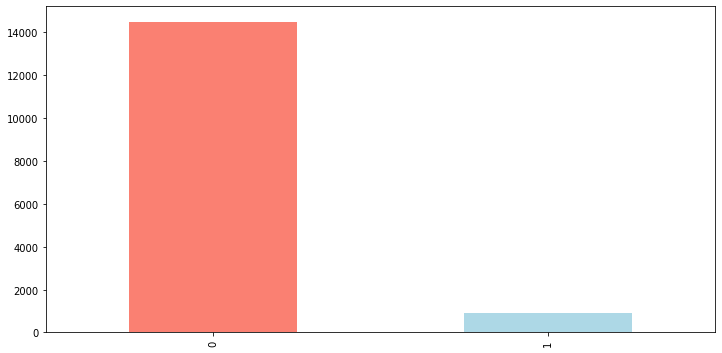

In [ ]:
plt.figure(figsize=(12,6))
dados["FraudFound_P"].value_counts().plot(kind="bar", color=['salmon', 'lightblue'])

Importante considerar o quanto desbalanceados os dados estão.

94% dos acionamentos de seguro não têm fraudes detectadas (ainda bem!)

O fato é que isso precisa ser levado em consideração na confecção dos modelos de machine learning.

###<font color='blue' style='font-size: 30px;'>Influência das variáveis quando houve fraude detectada</font>

Apesar de exaustivo, minha intenção é tentar levantar um perfil 'manjado' para identificação de possíveis fraudes, baseado, inicialmente, nas informações disponíveis na base de dados, sem qualquer tratamento prévio.

In [ ]:
#construção de função que percorre coluna a coluna, relacionando a variável com a fraude em questão

def percorre_colunas():
  
  for col in dados.columns:

    print("  ")
  
    dados_2 = dados.groupby(col)['FraudFound_P'].sum().sort_values(ascending = False)
    print(dados_2)
    print("---------")

    plt.figure(figsize=(12,6))
    dados_2.plot(kind="bar", color=['lightblue'])


  
Month
Mar    102
May     94
Jan     87
Aug     84
Feb     82
Apr     80
Jun     80
Sep     76
Oct     70
Dec     62
Jul     60
Nov     46
Name: FraudFound_P, dtype: int64
---------
  
WeekOfMonth
2    225
3    215
1    200
4    192
5     91
Name: FraudFound_P, dtype: int64
---------
  
DayOfWeek
Monday       160
Friday       154
Saturday     132
Sunday       122
Thursday     120
Tuesday      120
Wednesday    115
Name: FraudFound_P, dtype: int64
---------
  
Make
Pontiac      213
Toyota       186
Honda        179
Mazda        123
Chevrolet     94
Accura        59
Ford          33
Saab          11
VW             8
Mercury        6
Saturn         6
Dodge          2
BMW            1
Mecedes        1
Nisson         1
Jaguar         0
Lexus          0
Ferrari        0
Porche         0
Name: FraudFound_P, dtype: int64
---------
  
AccidentArea
Urban    790
Rural    133
Name: FraudFound_P, dtype: int64
---------
  
DayOfWeekClaimed
Monday       216
Tuesday      198
Wednesday    188
Friday  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

  
AgeOfVehicle
7 years        325
6 years        228
more than 7    206
5 years         95
new             32
4 years         21
3 years         13
2 years          3
Name: FraudFound_P, dtype: int64
---------
  
AgeOfPolicyHolder
31 to 35    360
36 to 40    237
41 to 50    144
51 to 65     70
26 to 30     33
16 to 17     31
over 65      30
21 to 25     16
18 to 20      2
Name: FraudFound_P, dtype: int64
---------
  
PoliceReportFiled
No     907
Yes     16
Name: FraudFound_P, dtype: int64
---------
  
WitnessPresent
No     920
Yes      3
Name: FraudFound_P, dtype: int64
---------
  
AgentType
External    919
Internal      4
Name: FraudFound_P, dtype: int64
---------
  
NumberOfSuppliments
none           472
more than 5    195
1 to 2         159
3 to 5          97
Name: FraudFound_P, dtype: int64
---------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

  
AddressChange_Claim
no change         825
2 to 3 years       51
4 to 8 years       33
1 year             11
under 6 months      3
Name: FraudFound_P, dtype: int64
---------
  
NumberOfCars
1 vehicle      850
2 vehicles      43
3 to 4          29
5 to 8           1
more than 8      0
Name: FraudFound_P, dtype: int64
---------
  
Year
1994    409
1995    301
1996    213
Name: FraudFound_P, dtype: int64
---------
  
BasePolicy
All Perils    452
Collision     435
Liability      36
Name: FraudFound_P, dtype: int64
---------
  
Fraud_evaluation
Sim    923
Não      0
Name: FraudFound_P, dtype: int64
---------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


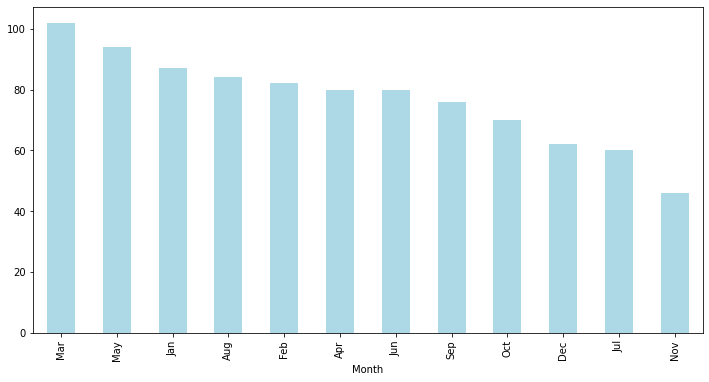

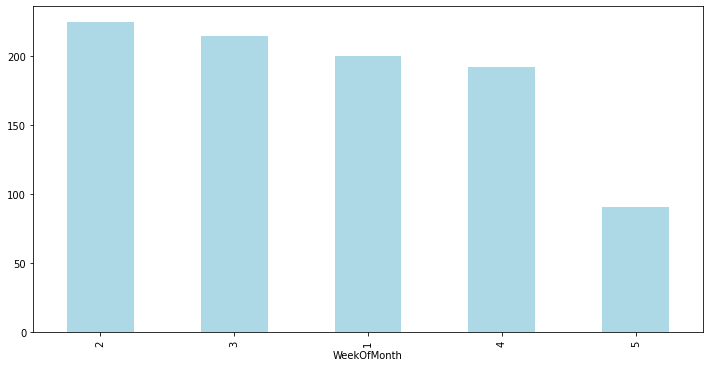

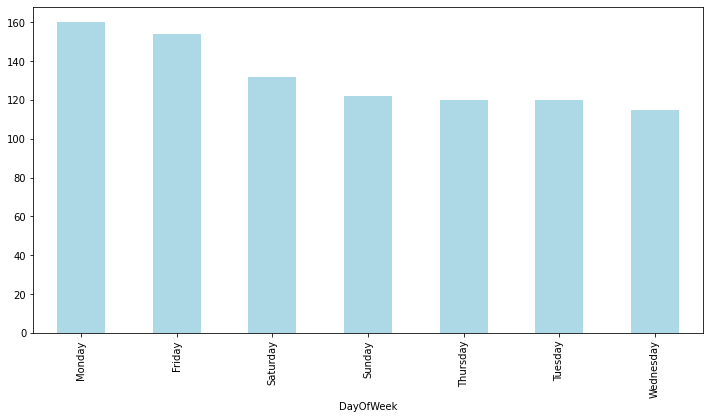

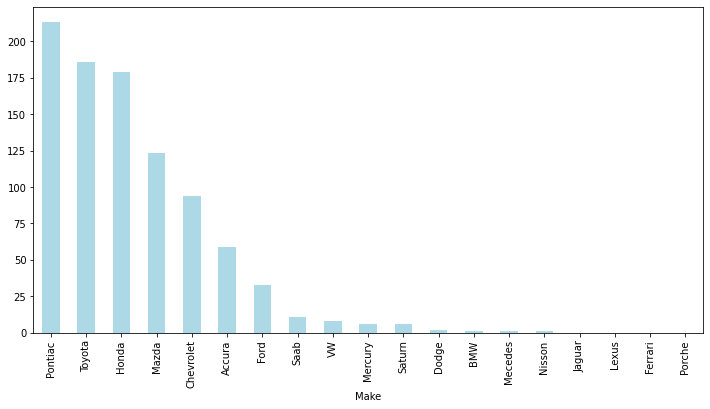

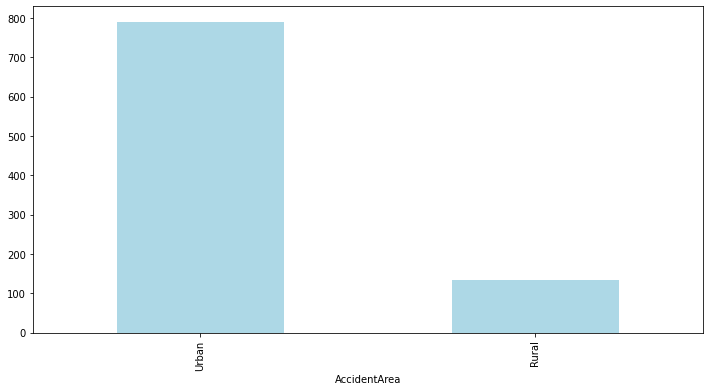

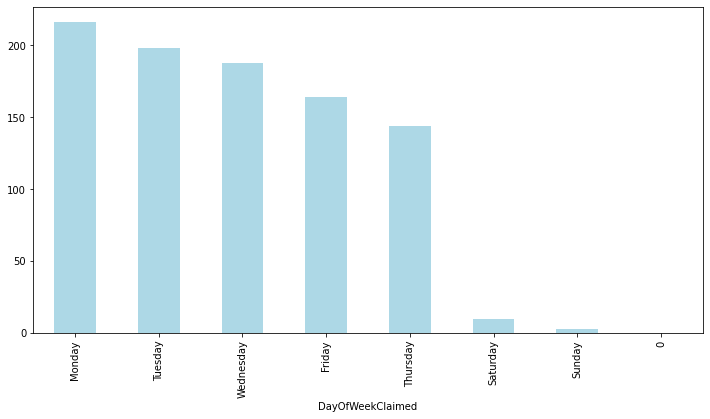

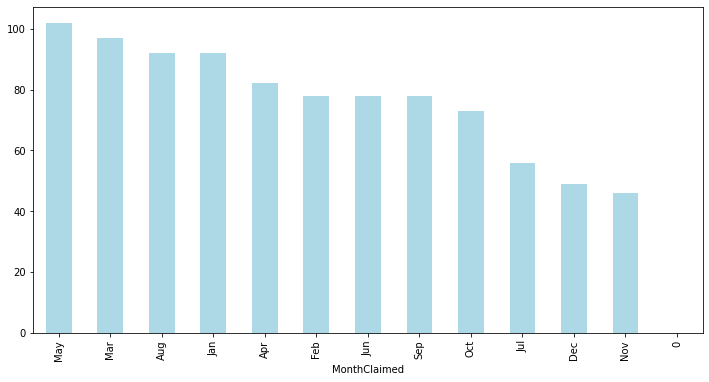

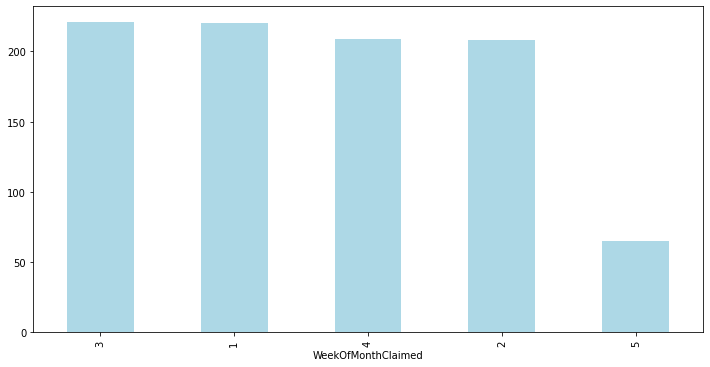

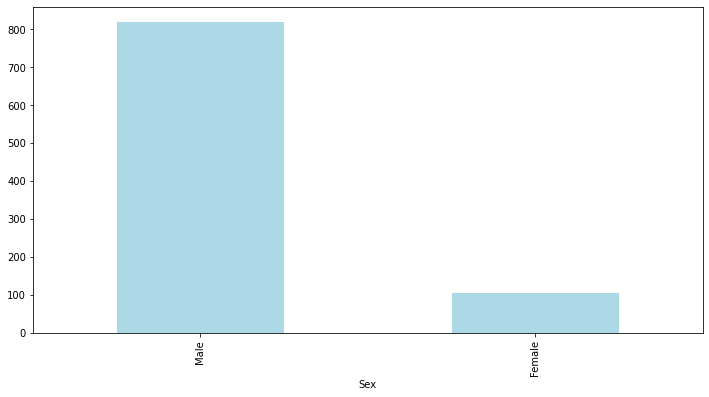

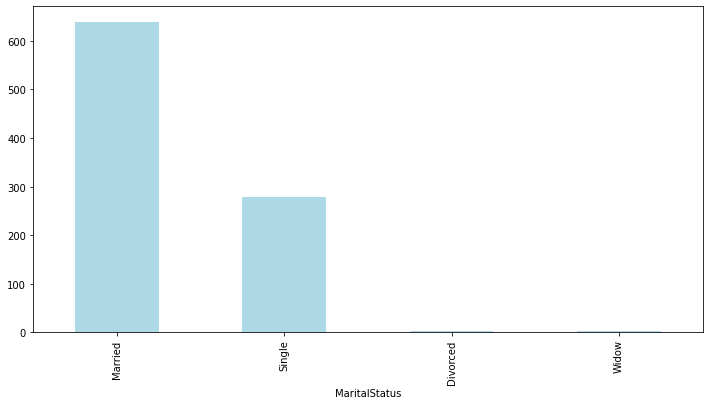

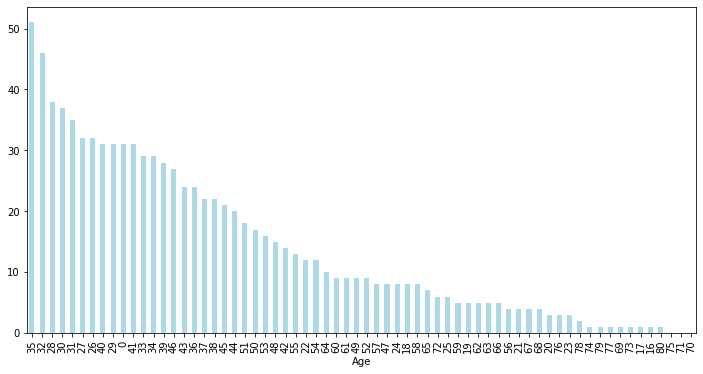

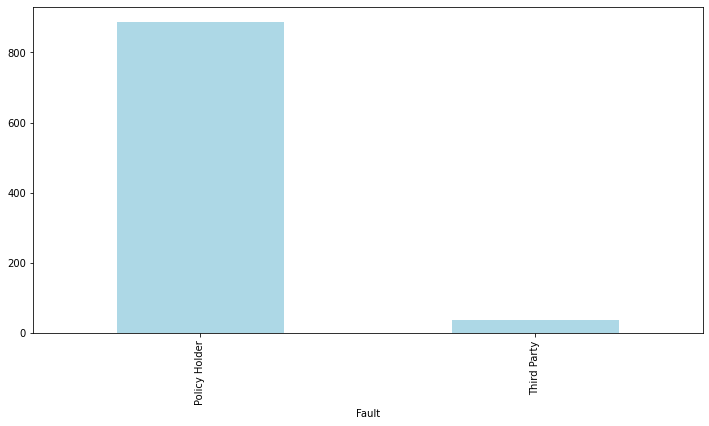

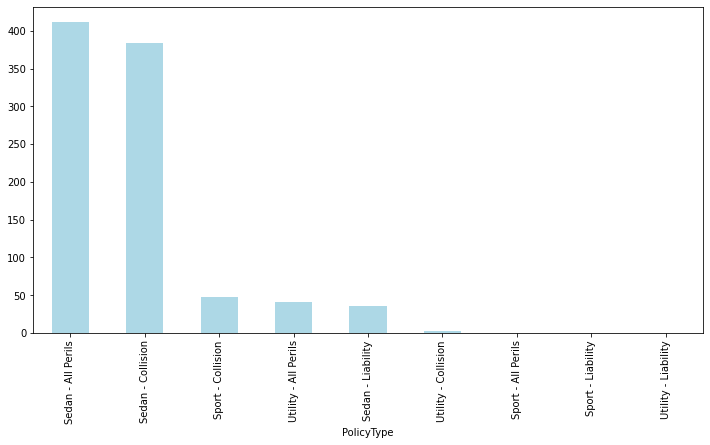

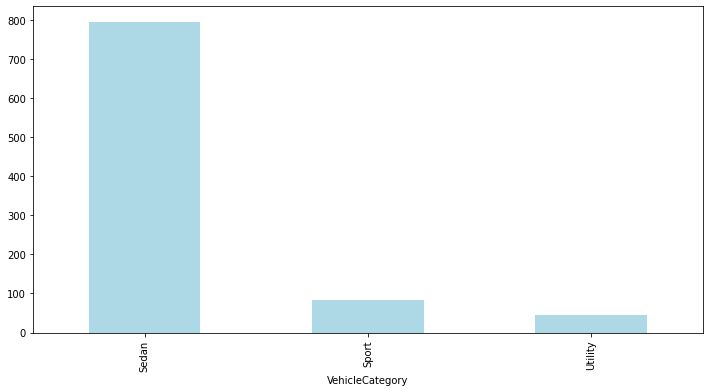

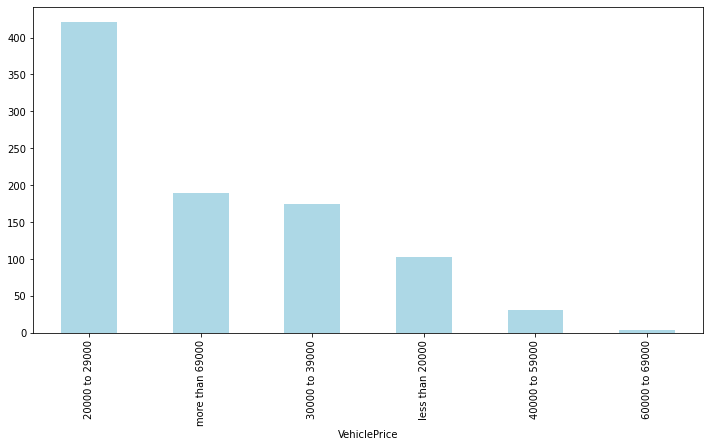

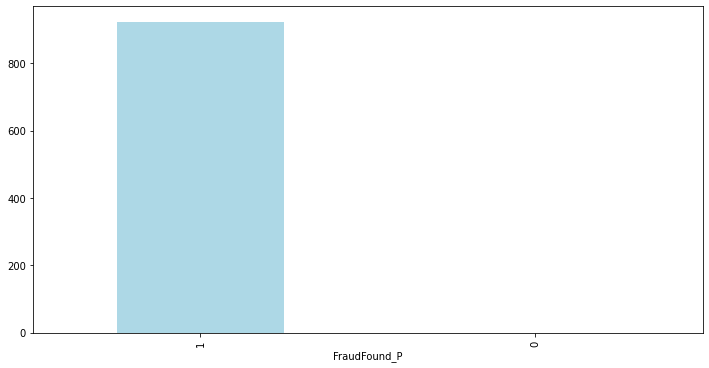

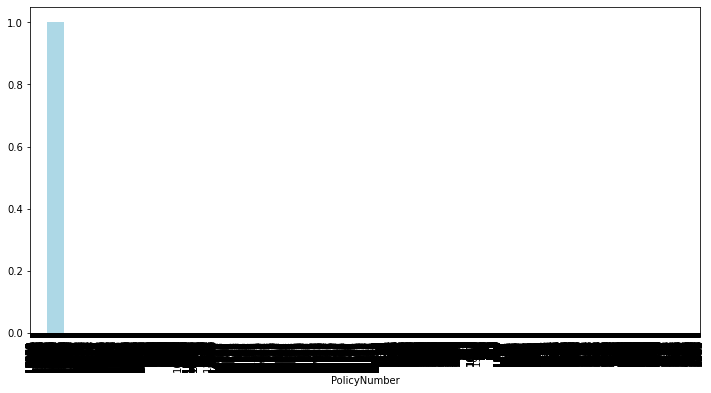

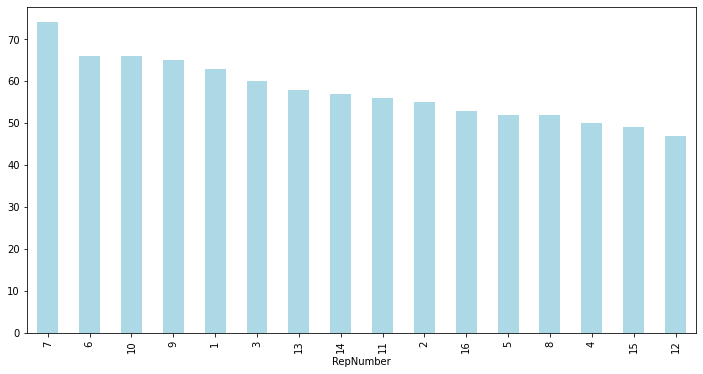

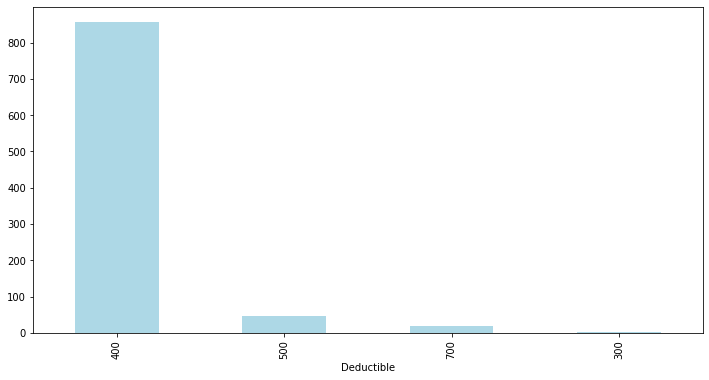

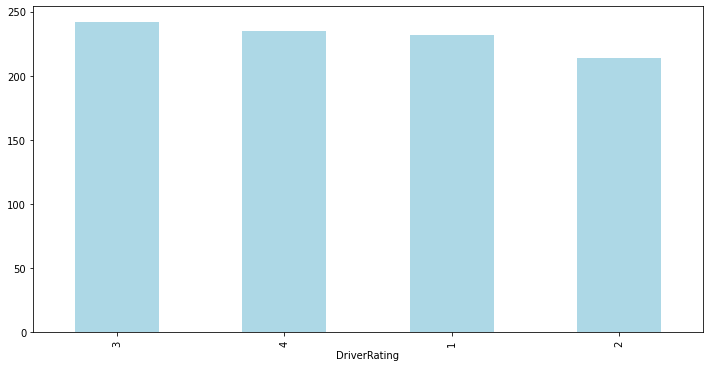

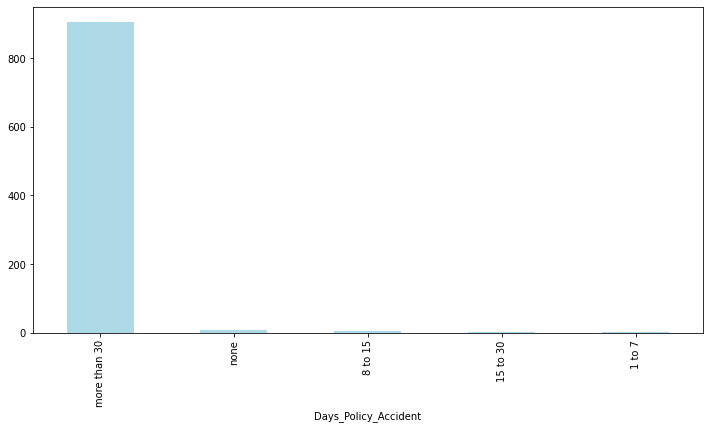

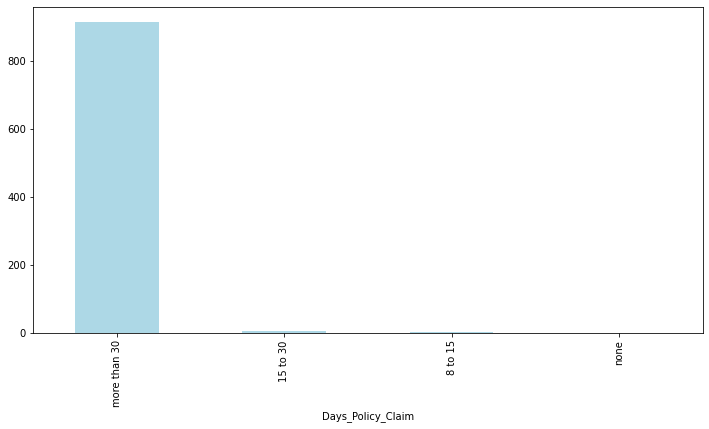

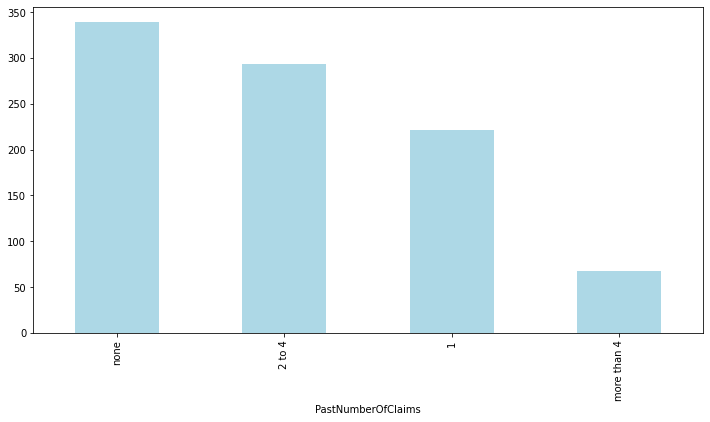

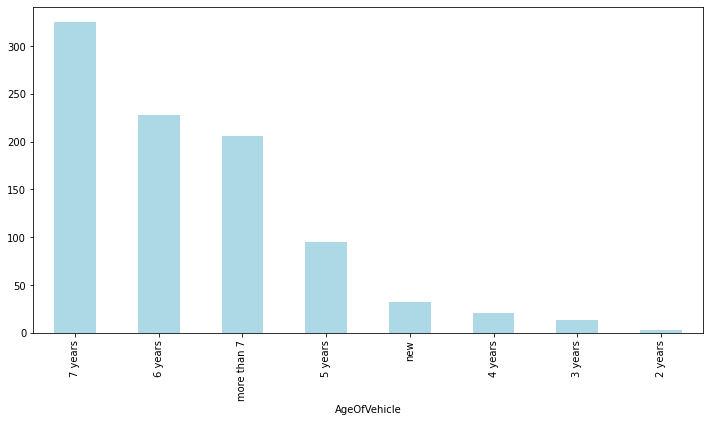

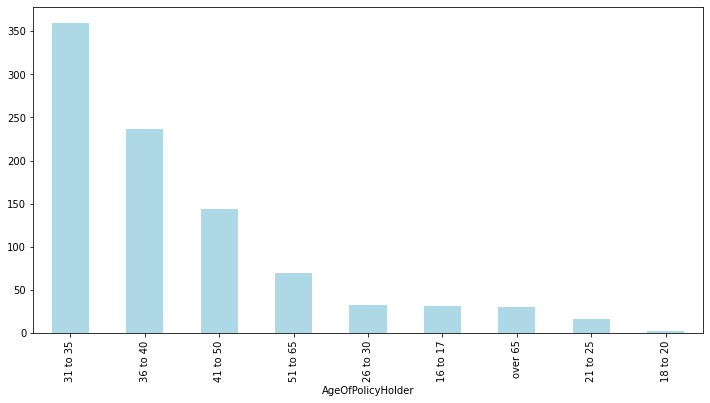

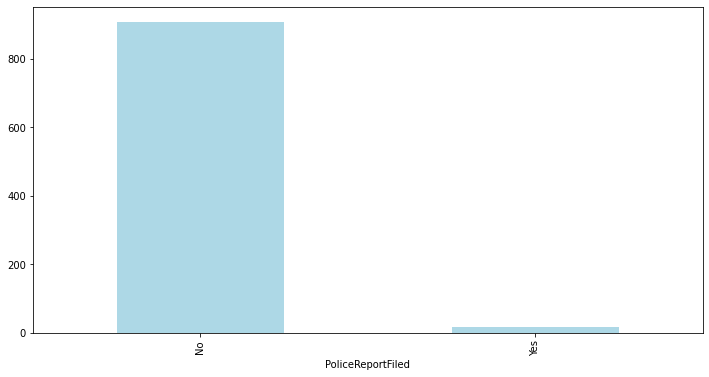

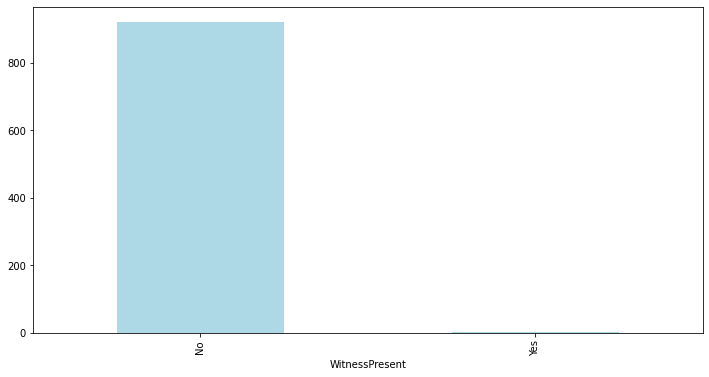

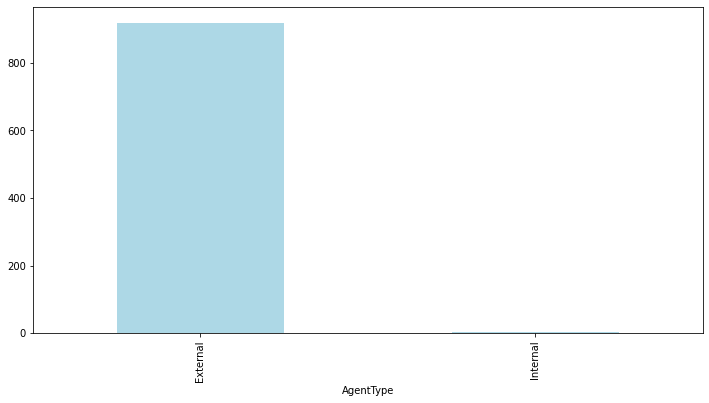

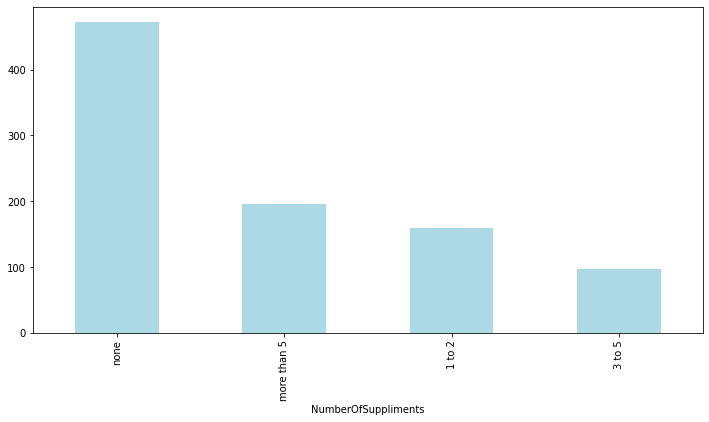

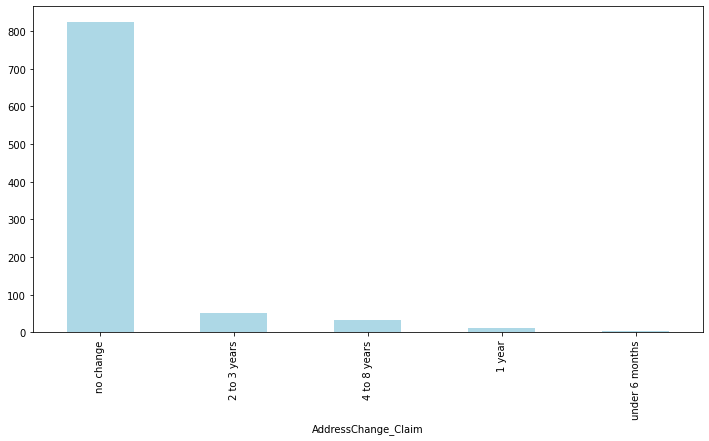

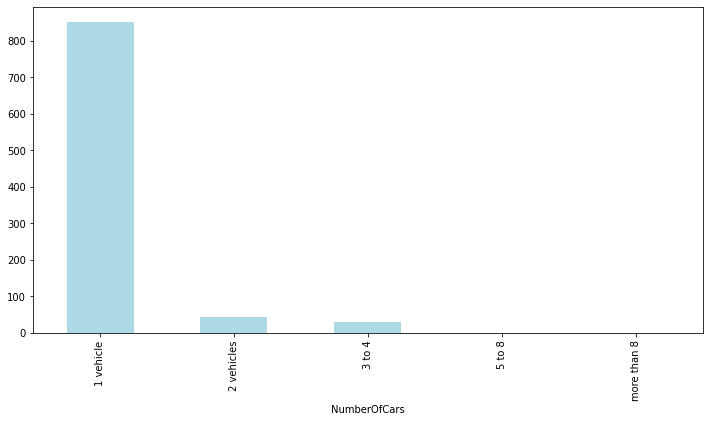

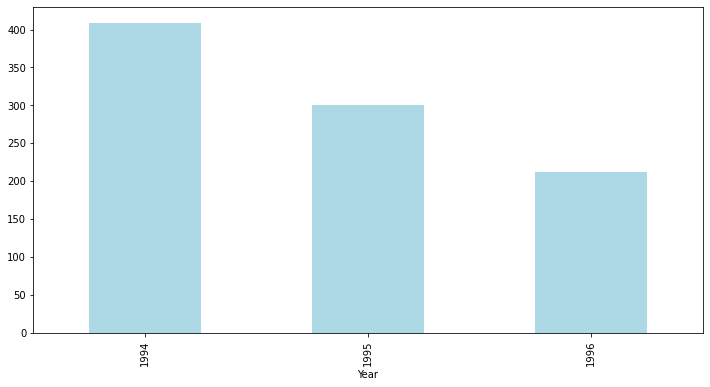

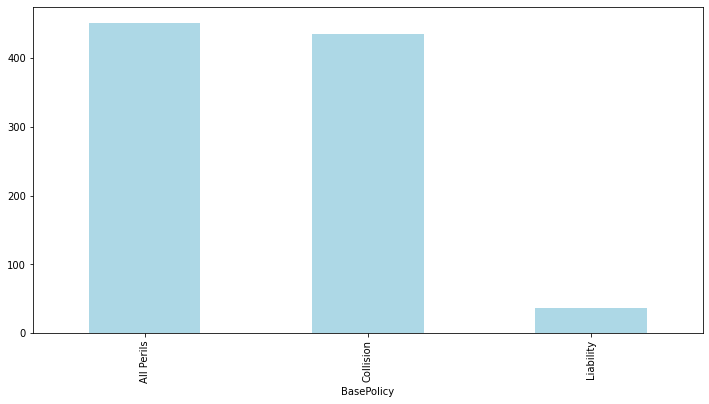

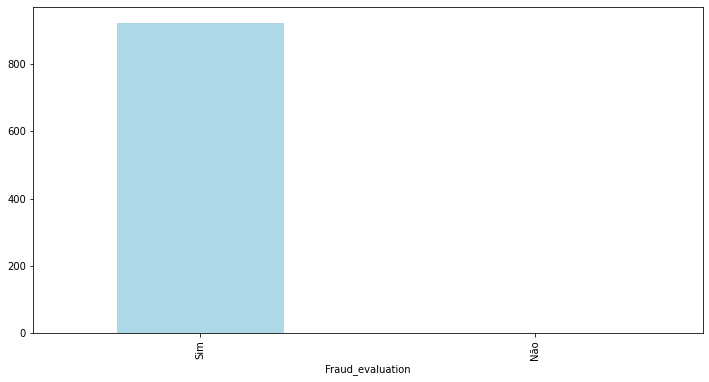

In [ ]:
percorre_colunas() #estou bypassando essa célula apenas para não ter que ficar rodando-a essa todas as vezes

Vou separar as variáveis em 3 tipos:



1.   **que caracterizam fraude**: área urbana, homem, casado (solteiro também), mais de 30 anos de idade, titular da apólice, carro tipo sedan, com preço de mercado entre **$ 20 e $ 29k**, franquia de $400, idade do veículo de 6 ou mais anos de uso, sem boletim de ocorrência, sem testemunhas, que nunca pediu atualização de endereço, com apenas 1 veículo, cobertura completa ou só por batida.
2.   **que não caracterizam fraude**: semana do mês e semana do mês reinvindicado, mês do ano e mês do ano reinvindicado (apesar do 1º semestre dominar as fraudes), dia da semana (apesar de segunda e sexta terem leve destaque), marca do carro, dia da semana reinvindicado (apesar de segunda estar em consonância com o dia da semana preferido), número da apólice, classificação do motorista, reincidente ou não e ano da ocorrência.
3.   **inconclusivas, por falta de informação**: 'repnumber', 'days policy accident', 'days policy claim', 'external agent type' e 'number of suppliments'.

Que falta faz uma reunião de alinhamento com o cliente!

Vamos ver a aderência desses itens com os modelos estatísticos das bibliotecas em Python!



##<font color='blue' style='font-size: 30px;'>Criação de modelos de ML</font>

###<font color='blue' style='font-size: 30px;'>Importando bibliotecas específicas de ML</font>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

###<font color='blue' style='font-size: 30px;'>Redução de dimensionalidade</font>

####<font color='blue' style='font-size: 30px;'>Apagando colunas desnecessárias</font>

Apesar dos algoritmos serem poderosos, colocar dados inúteis na confecção dos cálculos de nada ajudará o intento desse trabalho. Sendo assim, é preciso retirá-los antes de começar a calcular.

In [ ]:
dados_3 = dados_2.drop(columns = ["Month", "DayOfWeek","WeekOfMonth", "Make","DayOfWeekClaimed",
                                  "MonthClaimed","WeekOfMonthClaimed","PolicyNumber",
                                  "DriverRating","Year","Fraud_evaluation"],
                                   axis=1)
dados_3.head()

,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,1,0,2,21,0,5,1,5,0,12,...,3,1,3,0,0,0,3,0,2,2
1,1,1,2,34,0,4,1,5,0,15,...,3,4,4,1,0,0,3,3,0,1
2,1,1,1,47,0,4,1,5,0,7,...,0,5,6,0,0,0,3,3,0,1
3,0,1,1,65,1,2,1,0,0,4,...,0,6,7,1,0,0,2,3,0,2
4,1,0,2,27,1,4,1,5,0,3,...,3,3,4,0,0,0,3,3,0,1


####<font color='blue' style='font-size: 30px;'>Estratificação em dados de treino e teste</font>

Essa é uma das etapas mais importantes do trabalho, no qual separamos os dados em grupos de treinamento e teste dos modelos a serem testados.

In [ ]:
#Primeiros parâmetros de modelação

x = dados_3.drop("FraudFound_P", axis = 1)
y = dados_3["FraudFound_P"]

#Dividindo os dados entre treino e teste

SEED = 51
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.4, stratify = y)
print("Treino com %d elementos e teste com %d elementos" % (len(treino_x), len(teste_x)))

Treino com 9252 elementos e teste com 6168 elementos


####<font color='blue' style='font-size: 30px;'>Calculando correlações entre variáveis independentes</font>

De novo, a ideia é retirar informações inúteis, ou que estejam altamente correlacionadas. Se esse último ocorrer, optamos por apenas uma das variáveis.

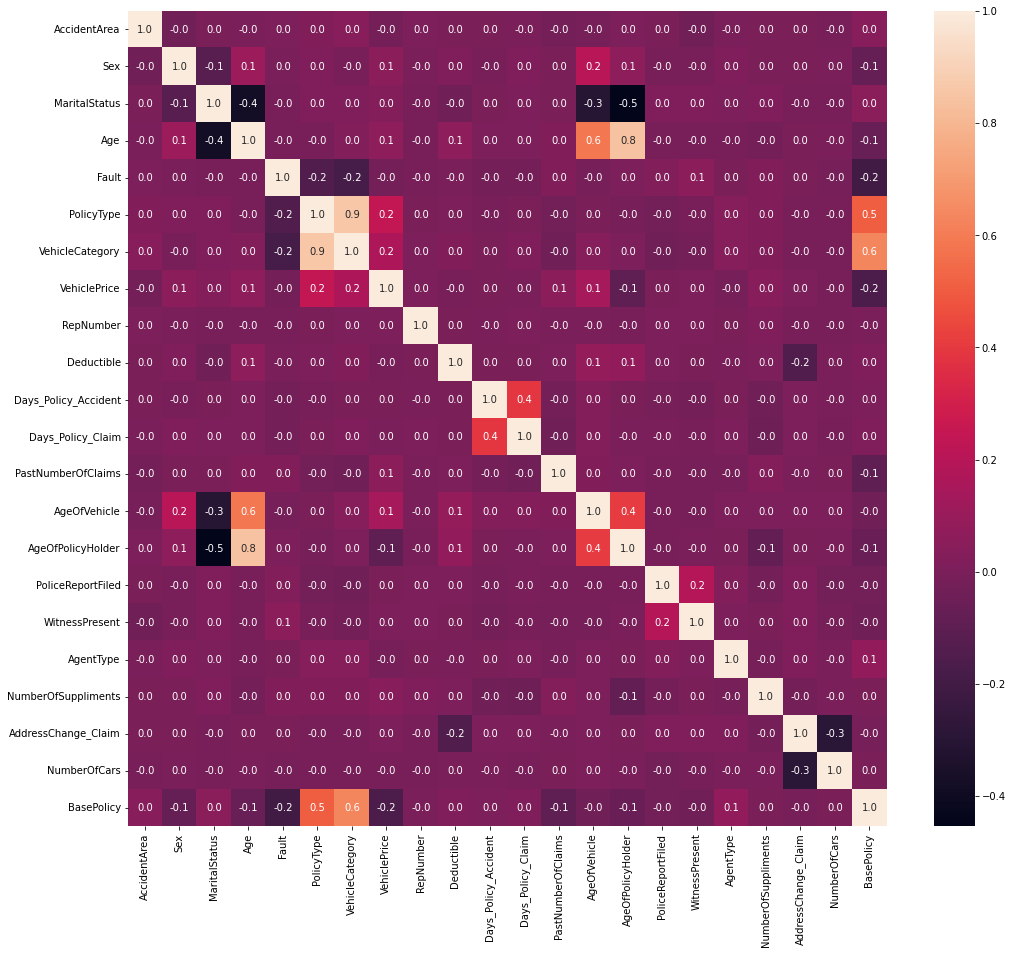

In [ ]:
matriz_correlacao = x.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

In [ ]:
#A ideia é eliminar eventuais variáveis de correlação muito altas
#Pelo resultado abaixo, não há nenhuma situação desse tipo

matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,RepNumber,Deductible,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
AccidentArea,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fault,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PolicyType,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehicleCategory,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehiclePrice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RepNumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deductible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###<font color='blue' style='font-size: 30px;'>Modelamento</font>

O "Dummy" serve como uma referência mínima para saber se o resultado de um modelo é bom ou ruim. O que for a abaixo desse valor, dever ser retrabalhado ou descartado.

####<font color='blue' style='font-size: 30px;'>Primeiro modelo: Dummy (baseline)</font>

In [ ]:
from sklearn.dummy import DummyClassifier

#Primeira tentativa: 'stratified'

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 94.02%


In [ ]:
#Segunda tentativa: 'mostfrequent'

dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 94.02%


####<font color='blue' style='font-size: 30px;'>Segundo modelo: LinearSVC</font>

In [ ]:
from sklearn.svm import LinearSVC

svc_linear = LinearSVC()
svc_linear.fit(treino_x, treino_y)
previsoes = svc_linear.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 94.02%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
#Matriz de confusão

previsoes = svc_linear.predict(teste_x)
print (pd.crosstab(teste_y, previsoes, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito     0   All
Real               
0        5799  5799
1         369   369
All      6168  6168


Análise do modelo Linear SVC: foi bem mal, pois não previu nenhum caso de fraude, mesmo obtendo-se um alto valor de acurácia.

####<font color='blue' style='font-size: 30px;'>Terceiro modelo: KNN</font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(treino_x, treino_y)
previsoes = knn.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 93.68%


In [ ]:
#Matriz de confusão

resultado_knn = knn.predict(teste_x)
print (pd.crosstab(teste_y, resultado_knn, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito     0   1   All
Real                   
0        5768  31  5799
1         359  10   369
All      6127  41  6168


Análise do modelo KNN: foi mal, pois ficou abaixo do Dummy.

####<font color='blue' style='font-size: 30px;'>Quarto modelo: StandardScaler</font>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(treino_x)
teste_x = scaler.transform(teste_x)

scaler = SVC()
scaler.fit(treino_x, treino_y)
previsoes = scaler.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


A acurácia foi 94.10%


In [ ]:
#Matriz de confusão

previsoes = scaler.predict(teste_x)
print (pd.crosstab(teste_y, previsoes, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito     0  1   All
Real                  
0        5798  1  5799
1         363  6   369
All      6161  7  6168


In [ ]:
#Fazendo as predições nos dados de teste

from sklearn.metrics import classification_report,confusion_matrix

preditos_svc = scaler.predict(teste_x)
print(classification_report(teste_y, preditos_svc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5799
           1       0.86      0.02      0.03       369

    accuracy                           0.94      6168
   macro avg       0.90      0.51      0.50      6168
weighted avg       0.94      0.94      0.91      6168



Análise do modelo SVC: foi bem na acurácia, mas obteve um valor muito alto de "falsos negativos".

####<font color='blue' style='font-size: 30px;'>Quinto modelo: DecisionTreeClassifier</font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_1 = DecisionTreeClassifier(max_depth=3)
tree_1.fit(treino_x, treino_y)
previsoes = tree_1.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


A acurácia foi 94.00%


In [ ]:
#Matriz de confusão

previsoes = tree_1.predict(teste_x)
print (pd.crosstab(teste_y, previsoes, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito     0  1   All
Real                  
0        5798  1  5799
1         369  0   369
All      6167  1  6168


Análise do modelo Decision Tree: foi bem na acurácia, mas não obteve nenhum resultado positivo para fraude.

####<font color='blue' style='font-size: 30px;'>Sexto modelo: MultinomialNB</font>

Infelizmente, esse modelo não rodou adequadamente para essa base de dados.

####<font color='blue' style='font-size: 30px;'>Sétimo modelo: AdaBoostClassifier</font>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(treino_x, treino_y)
previsoes = ada.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 93.56%


In [ ]:
#Matriz de confusão

previsoes = ada.predict(teste_x)
print (pd.crosstab(teste_y, previsoes, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito     0   1   All
Real                   
0        5765  34  5799
1         363   6   369
All      6128  40  6168


####<font color='blue' style='font-size: 30px;'>Oitavo modelo: RandomForest</font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(treino_x, treino_y)
previsoes = random.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 93.90%


In [ ]:
#Matriz de confusão

previsoes = random.predict(teste_x)
print (pd.crosstab(teste_y, previsoes, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito     0   1   All
Real                   
0        5778  21  5799
1         355  14   369
All      6133  35  6168


####<font color='blue' style='font-size: 30px;'>Nono modelo: XGBoost</font>

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# ajuste do modelo nos dados de treino
xg = XGBClassifier()
xg.fit(treino_x, treino_y)
previsoes = xg.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 94.16%


In [ ]:
#Matriz de confusão

print (pd.crosstab(teste_y, previsoes, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito     0  1   All
Real                  
0        5799  0  5799
1         360  9   369
All      6159  9  6168


In [ ]:
#Fazendo as predições nos dados de teste

preditos_xgb = xg.predict(teste_x)
print(classification_report(teste_y, preditos_xgb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5799
           1       1.00      0.02      0.05       369

    accuracy                           0.94      6168
   macro avg       0.97      0.51      0.51      6168
weighted avg       0.95      0.94      0.91      6168



####<font color='blue' style='font-size: 30px;'>Tentativa de melhorar a acurácia do modelo, juntando o melhor de modelos com bons resultados</font>

In [ ]:
from sklearn.ensemble import VotingClassifier


# Voting Classifier with soft voting 
voto = VotingClassifier(estimators=[('Random', random),('xg',xg)], voting='soft')
voto = voto.fit(treino_x,treino_y)
y_predito = voto.predict(teste_x)
print(classification_report(teste_y, y_predito))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5799
           1       1.00      0.03      0.05       369

    accuracy                           0.94      6168
   macro avg       0.97      0.51      0.51      6168
weighted avg       0.95      0.94      0.92      6168



##<font color='blue' style='font-size: 30px;'>Conclusão</font>

De todos modelos de machine learning treinados e testados, o que apresentou melhor performance foi o XGBoost. Importante notar, porém, que todos os modelos apresentaram um grau considerável de falsos positivos, o que quer dizer que alguns casos o modelo classifica como 'não-fraude' itens que deveriam ter sido intitulados de 'fraude'.
O mais importante é saber que nenhum modelo é perfeito, e acertará 100% das ocorrências. Nesse caso avaliado, mais de 94% dos dados são classificados corretamente, o que certamente diminuirá os prejuízos com fraudes desse tipo.